#NYC Traffic Accidents Analysis

## Business Problem

The road organization authority has experienced a significant increase in road accidents. They have hired me as a data analyst to assess driver compliance with road rules, provide insights, and offer recommendations to improve the driving experience. The specific areas of interest are:

1. % of Total Accidents by Month: Analyzing the monthly distribution of accidents to identify any seasonal patterns.

2. % of Total Accidents by Day and Hour: Examining the distribution of accidents by day of the week and hour of the day to identify peak periods.

3. Total Accidents by Street Name: Identifying streets with a high number of accidents to focus on areas requiring attention.

4. Most Common Factors Leading to Accidents, Especially Fatalities: Investigating the prevailing factors contributing to accidents, with a specific emphasis on fatalities, to prioritize intervention strategies.

The goal is to leverage data-driven insights to implement effective road safety awareness, enforcement, and infrastructure measures, ultimately reducing accidents and improving the driving experience.

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

## Data Cleaning

In [ ]:
# reading data from the file
df=pd.read_csv('/content/NYC Accidents 2020.csv')

In [ ]:
# checking dimension of dataset
df.shape

(74881, 29)

In [ ]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [ ]:
# drop unnecessary columns which don't help with the analysis and contain na values
df.drop(['BOROUGH', 'LOCATION', 'LATITUDE', 'ZIP CODE', 'LONGITUDE','CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2',  'CONTRIBUTING FACTOR VEHICLE 3',
          'CONTRIBUTING FACTOR VEHICLE 4',  'CONTRIBUTING FACTOR VEHICLE 5'
         , 'VEHICLE TYPE CODE 2',   'VEHICLE TYPE CODE 3',  'VEHICLE TYPE CODE 4',  'VEHICLE TYPE CODE 5'
         ], axis=1, inplace=True)


In [ ]:
df.shape

(74881, 14)

In [ ]:
pd.isnull(df).sum()

CRASH DATE                           0
CRASH TIME                           0
ON STREET NAME                   19437
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
dtype: int64

In [ ]:
# drop null values
df.dropna(inplace=True)
pd.isnull(df).sum()

CRASH DATE                       0
CRASH TIME                       0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
dtype: int64

In [ ]:
df.shape # 54k records with 14 cols

(54951, 14)

In [ ]:
# summary of descriptive statistics for numeric data
df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,54951.000000,54951.000000,54951.000000,54951.000000,54951.000000,54951.000000,54951.000000,54951.000000
mean,0.416116,0.002420,0.049990,0.000910,0.047642,0.000146,0.318484,0.001365
std,0.775783,0.052711,0.227167,0.030151,0.218743,0.012065,0.750168,0.041117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,4.000000,4.000000,1.000000,3.000000,1.000000,15.000000,4.000000


The above statistics indicate that the dataset primarily consists of instances where no persons were killed, as evident from the low mean, median, and quartiles. However, there are instances where up to two people were killed, with motorists being the most prominent victims, as indicated by the maximum value.

## Exploratory Data Analysis

### % of Total Accidents By Months

In [ ]:
df['CRASH DATE']= pd.to_datetime(df['CRASH DATE'])
df['CRASH MONTH'] = df['CRASH DATE'].dt.strftime('%B')

In [ ]:
total_accidents=len(df)
total_accidents_month_dict = {}
for _, row in df.iterrows():
  group=row['CRASH MONTH']
  total_accidents_month_dict[group]=total_accidents_month_dict.get(group,0) + 1

In [ ]:
total_accidents_month_dict.keys()

dict_keys(['August', 'July', 'June', 'May', 'April', 'March', 'February', 'January'])

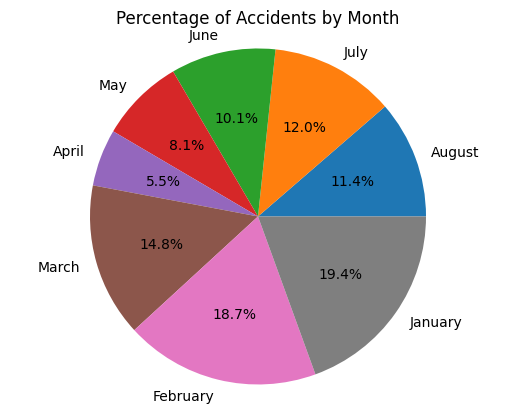

In [ ]:
# Plot a pie chart
labels = total_accidents_month_dict.keys()
sizes = total_accidents_month_dict.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Accidents by Month')
plt.axis('equal')
plt.show()

The pie chart demonstrates a seasonal pattern in NYC accidents. January had the highest percentage (19.4%) followed by February (18.7%). Winter conditions, reduced daylight, and potential holiday-related factors contribute to this trend. In contrast, April had the lowest percentage (5.5%), likely due to improving weather conditions and drivers adapting to changing road conditions.

### % of Accidents By Day of Week and Hour of Day



In [ ]:
df['CRASH DAY'] = df['CRASH DATE'].dt.strftime('%A')
df['CRASH TIME']= pd.to_datetime(df['CRASH TIME'])
df['CRASH HOUR'] =df['CRASH TIME'].dt.hour

In [ ]:
# Define hour ranges and labels
hour_ranges = [(0, 6), (6, 12), (12, 18), (18, 24)]
hour_labels = ['Midnight - 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', '6 PM - Midnight']

# Categorize the hours based on the defined ranges
df['CRASH HOUR RANGE'] = pd.cut(df['CRASH HOUR'], bins=[x[0] for x in hour_ranges] + [hour_ranges[-1][1]],
                               labels=hour_labels, right=False)

In [ ]:
total_accidents_day_dict = {}
total_accidents_hour_dict = {}

for _, row in df.iterrows():
  day_group=row['CRASH DAY']
  hour_group=row['CRASH HOUR RANGE']
  total_accidents_day_dict[day_group]=total_accidents_day_dict.get(day_group,0) + 1
  total_accidents_hour_dict[hour_group]=total_accidents_hour_dict.get(hour_group,0) + 1

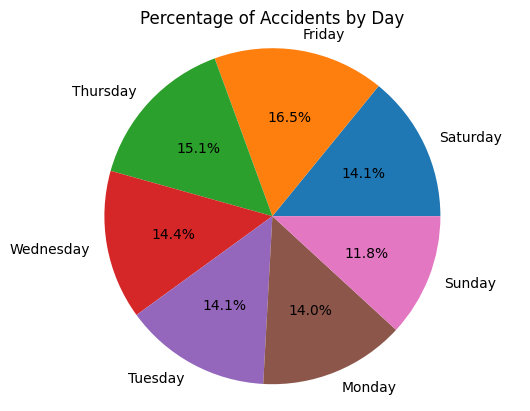

In [ ]:
# Plot a pie chart
labels = total_accidents_day_dict.keys()
sizes = total_accidents_day_dict.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Accidents by Day')
plt.axis('equal')
plt.show()

Based on the pie chart, the distribution of accidents across the days of the week is fairly even. However, Friday stands out with the highest percentage of accidents. This could be attributed to the increased commuter traffic as people who study or work away from their homes tend to travel back to their places on Fridays.

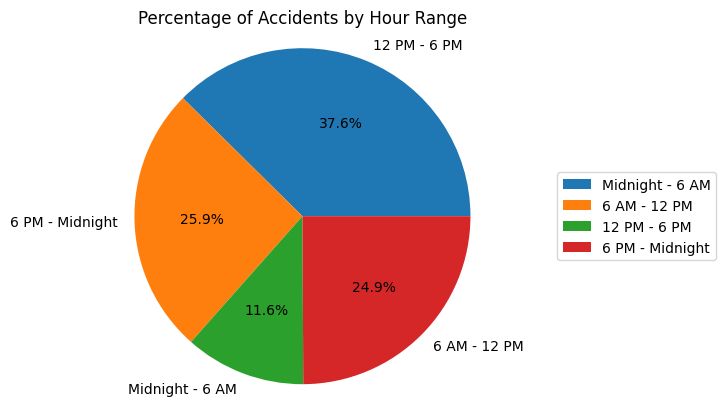

In [ ]:
# Plot a pie chart
labels = total_accidents_hour_dict.keys()
sizes = total_accidents_hour_dict.values()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Accidents by Hour Range')

# Add a legend indicating the hours covered by each category
hours_legend = ['Midnight - 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', '6 PM - Midnight']
plt.legend(labels=hours_legend, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.show()

37.6% of accidents occurred from 12pm to 6pm, while 25.9% happened between 6pm and midnight. Increased traffic volume and potential distractions during these periods contribute to the higher accident rates.


### Total Accidents By Street Name


In [ ]:
total_accidents_street = {}

for _, row in df.iterrows():
  street_group=row['ON STREET NAME']
  total_accidents_street[street_group]=total_accidents_street.get(street_group,0) + 1

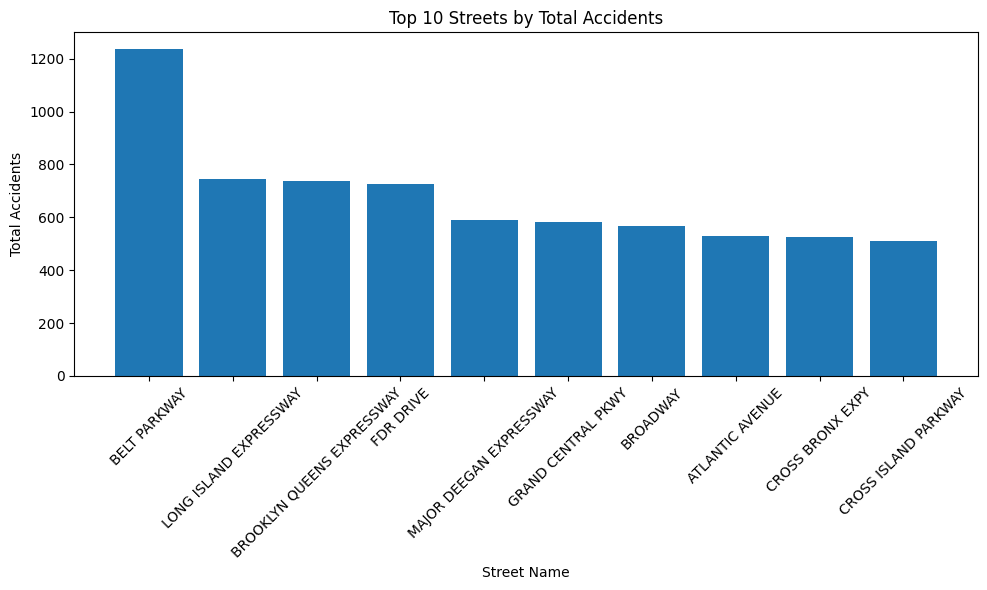

In [ ]:
top_10_streets = dict(sorted(total_accidents_street.items(), key=lambda x: x[1], reverse=True)[:10])

# Prepare data for top 10 streets
top_streets = list(top_10_streets.keys())
top_accidents = list(top_10_streets.values())

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_streets, top_accidents)
plt.xlabel('Street Name')
plt.ylabel('Total Accidents')
plt.title('Top 10 Streets by Total Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()

Belt Parkway had the highest number of accidents, with over 1200 incidents, followed by Long Island Expressway with approximately 800. It is essential to implement effective measures to decrease these numbers and enhance the overall safety of driving for all residents of NYC.

###5 Most Common Contributing Factors For Accidents

In [ ]:
# Mapping of contributing factors to main categories
# Mapping of contributing factors to main categories
contributing_factor_mapping = {
    'Passing Too Closely': 'Reckless Driving',
    'Reaction to Uninvolved Vehicle': 'Reckless Driving',
    'Backing Unsafely': 'Reckless Driving',
    'Unsafe Lane Changing': 'Reckless Driving',
    'Unsafe Speed': 'Speeding',
    'Oversized Vehicle': 'Vehicle-Related Factors',
    'Driver Inattention/Distraction': 'Distracted Driving',
    'Failure to Yield Right-of-Way': 'Reckless Driving',
    'Pavement Slippery': 'Road Condition',
    'Following Too Closely': 'Reckless Driving',
    'Driver Inexperience': 'Driver Inexperience',
    'Other Vehicular': 'Pedestrian/Cyclist/Vehicle Intrusion',
    'Failure to Keep Right': 'Reckless Driving',
    'Passing or Lane Usage Improper': 'Reckless Driving',
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Pedestrian/Cyclist/Vehicle Intrusion',
    'Alcohol Involvement': 'Drunk Driving',
    'Fell Asleep': 'Fatigue',
    'Traffic Control Disregarded': 'Reckless Driving',
    'Animals Action': 'Other Environmental Factors',
    'Glare': 'Other Environmental Factors',
    'Turning Improperly': 'Reckless Driving',
    'Brakes Defective': 'Vehicle Defects',
    'Obstruction/Debris': 'Road Condition',
    'Steering Failure': 'Vehicle Defects',
    'Lost Consciousness': 'Fatigue',
    'View Obstructed/Limited':'Weather Condition',
    'Traffic Control Device Improper/Non-Working': 'Road Condition',
    'Aggressive Driving/Road Rage': 'Reckless Driving',
    'Fatigued/Drowsy': 'Fatigue',
    'Tinted Windows': 'Vehicle Defects',
    'Passenger Distraction': 'Distracted Driving',
    'Pavement Defective': 'Road Condition',
    'Accelerator Defective': 'Vehicle Defects',
    'Outside Car Distraction': 'Distracted Driving',
    'Using On Board Navigation Device': 'Distracted Driving',
    'Cell Phone (hand-Held)': 'Distracted Driving',
    'Illnes': 'Medical Condition',
    'Tire Failure/Inadequate': 'Vehicle Defects',
    'Driverless/Runaway Vehicle': 'Vehicle Defects',
    'Drugs (illegal)': 'Drugged Driving',
    'Headlights Defective': 'Vehicle Defects',
    'Physical Disability': 'Medical Condition',
    'Prescription Medication': 'Medical Condition',
    'Lane Marking Improper/Inadequate': 'Road Condition',
    'Cell Phone (hands-free)': 'Distracted Driving',
    'Vehicle Vandalism': 'Vehicle Defects',
    'Shoulders Defective/Improper': 'Road Condition',
    'Eating or Drinking': 'Distracted Driving',
    'Other Lighting Defects': 'Vehicle Defects',
    'Tow Hitch Defective': 'Vehicle Defects',
    'Listening/Using Headphones': 'Distracted Driving',
    'Texting': 'Distracted Driving',
    'Other Electronic Device': 'Distracted Driving'
}


new_df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified'].copy()
# Create a new column 'CATEGORY' by mapping the contributing factors
new_df['CATEGORY'] = new_df['CONTRIBUTING FACTOR VEHICLE 1'].map(contributing_factor_mapping)

In [ ]:
new_df['CATEGORY'].unique()

array(['Reckless Driving', 'Speeding', 'Vehicle-Related Factors',
       'Distracted Driving', 'Road Condition', 'Driver Inexperience',
       'Pedestrian/Cyclist/Vehicle Intrusion', 'Drunk Driving', 'Fatigue',
       'Other Environmental Factors', 'Vehicle Defects',
       'Weather Condition', 'Medical Condition', 'Drugged Driving'],
      dtype=object)

In [ ]:
total_accidents_category_dict = {}

for _, row in new_df.iterrows():
  category_group=row['CATEGORY']
  total_accidents_category_dict[category_group]=total_accidents_category_dict.get(category_group,0) + 1

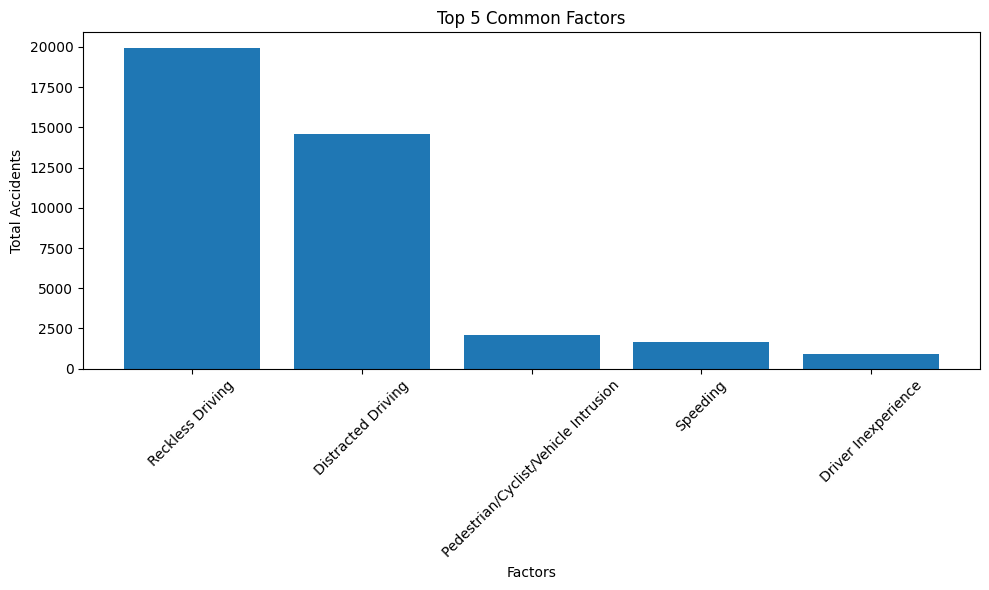

In [ ]:
# Sort the dictionary by values in descending order
sorted_factors = sorted(total_accidents_category_dict.items(), key=lambda x: x[1], reverse=True)

# Plot a pie chart
labels = dict(sorted_factors[:5]).keys()
sizes = dict(sorted_factors[:5]).values()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(labels, sizes)
plt.xlabel('Factors')
plt.ylabel('Total Accidents')
plt.title('Top 5 Common Factors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()

As demonstrated by the above bar chart, Reckless Driving was the leading cause of car accidents in NYC, with approximately 20,000 reported incidents. Distracted Driving closely followed with around 15,000 accidents. The remaining factors had lower and similar figures. These findings emphasize the significant contribution of distracted minds and a lack of adherence to traffic rules to the high number of accidents in NYC. Addressing these issues is crucial to enhance road safety and reduce accidents.

In [ ]:
# check for common factors with fatilities
new_df=new_df[new_df['NUMBER OF PERSONS KILLED']>=1]
total_fatal_accidents_category_dict = {}

for _, row in new_df.iterrows():
  category_group=row['CATEGORY']
  total_fatal_accidents_category_dict[category_group]=total_fatal_accidents_category_dict.get(category_group,0) + row['NUMBER OF PERSONS KILLED']

In [ ]:
len(new_df)

96

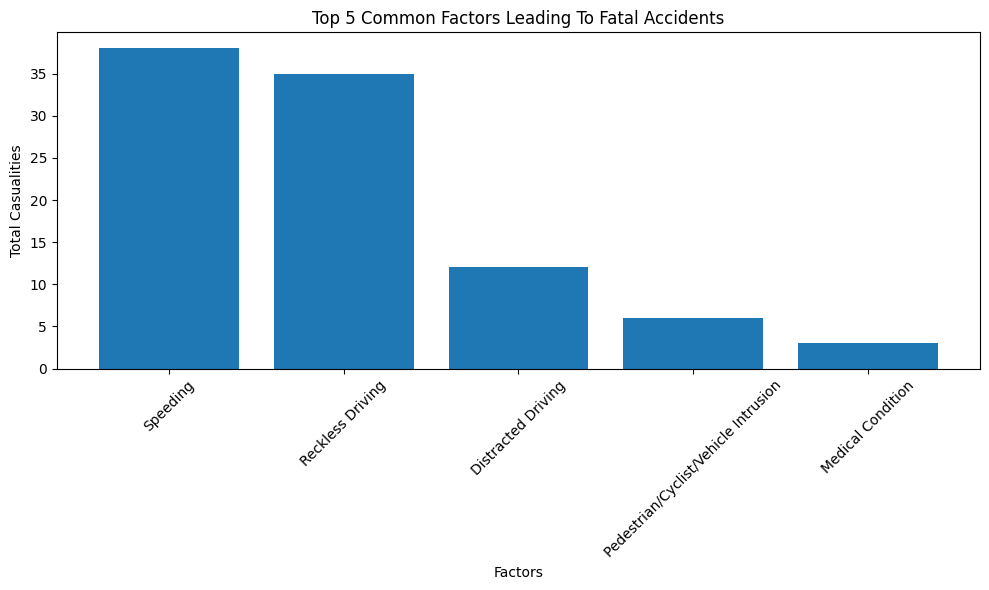

In [ ]:
# Sort the dictionary by values in descending order
sorted_factors = sorted(total_fatal_accidents_category_dict.items(), key=lambda x: x[1], reverse=True)

# Plot a pie chart
labels = dict(sorted_factors[:5]).keys()
sizes = dict(sorted_factors[:5]).values()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(labels, sizes)
plt.xlabel('Factors')
plt.ylabel('Total Casualities')
plt.title('Top 5 Common Factors Leading To Fatal Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()

Out of approximately 54,000 incident data records, a total of 96 fatal accidents were identified, which fortunately represents a relatively low number. However, upon closer examination of the fatal accidents chart, it becomes evident that Speeding was a major contributing factor, resulting in 35 or more casualties. Reckless Driving was also prominent in causing fatal accidents. Although the other three factors had lower values, it is crucial to take significant measures, particularly in addressing driver behaviors, to promote adherence to rules and ensure a safe driving experience for all.

## Conclusion

Key Takeaways:

- Winter months and Fridays require extra caution due to increased accident rates.
- Afternoon and evening hours have higher accident frequencies, demanding heightened awareness.
- Reckless Driving, Distracted Driving, and Speeding are major concerns that need attention.

Suggestions:

1. Enhance driver education and awareness campaigns to discourage reckless and distracted driving.
2. Strengthen law enforcement measures to deter speeding and reckless driving behaviors.
3. Improve road infrastructure and signage for better traffic management and accident prevention.
4. Encourage the use of technology, such as hands-free devices, to reduce distractions while driving.

By implementing these measures and promoting a culture of safe driving, NYC can strive towards reducing accidents, enhancing road safety, and safeguarding its citizens.